In [13]:
import pandas as pd
import numpy as np
import re
import nltk
import unicodedata
import matplotlib.pyplot as plt
import wordcloud
from sklearn.preprocessing import MinMaxScaler

In [4]:
def clean_strings(text):
    text = ' '.join(re.sub("(#[A-Za-z0-9]+)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return text

def tokenization(text):
    text = re.split('\W+', text)
    return text

def remove_stopwords(text):
    stopwords = nltk.corpus.stopwords.words('english') + ['amp']
    text = [word for word in text if word not in stopwords]
    return text

def join_tokens(text):
    text = ' '.join(text)
    return text

In [5]:
company_df = pd.read_csv('../Data/company_map.csv')
company_df.head()

,Company,NewsKey,BlogKey,TweetKey,TrendsKey,PerformanceKey
0,Apple,Apple,apple,#Apple,Apple,Apple
1,Microsoft,Microsoft,microsoft,#Microsoft,Microsoft Corporation,Microsoft
2,GameStop,GameStop,gamestop,#GameStop,GameStop,GameStop
3,Mercedes,Mercedes-Benz,mercedes-benz,#MercedesBenz,Mercedes-Benz,Mercedes
4,Tesla,Tesla,tesla,#Tesla,Tesla,Tesla


In [6]:
tweets_df = pd.read_csv('../Data/tweets.csv')
tweets_df = tweets_df.drop(['Tweet Id'], axis=1)

tweets_df['Text'] = tweets_df['Text'].apply(lambda x: clean_strings(x))
tweets_df['Text'] = tweets_df['Text'].apply(lambda x: tokenization(x.lower()))
tweets_df['Text'] = tweets_df['Text'].apply(lambda x: remove_stopwords(x))
tweets_df['Text'] = tweets_df['Text'].apply(lambda x: join_tokens(x))

tweets_df = tweets_df.merge(company_df[['Company', 'TweetKey']], left_on='Tag', right_on='TweetKey')
tweets_df = tweets_df.drop(['Tag', 'TweetKey'], axis=1)

In [7]:
tweets_df.head()

,Datetime,Text,Company
0,2020-03-30 23:59:45+00:00,apple iphone 11 pro max 64gb 256gb 512gb unloc...,Apple
1,2020-03-30 23:56:15+00:00,join new text system register send keyword gir...,Apple
2,2020-03-30 23:56:10+00:00,darren busy kitchen apple apple cranberry baki...,Apple
3,2020-03-30 23:54:48+00:00,apple arcade release date games everything els...,Apple
4,2020-03-30 23:52:37+00:00,refurb unlocked apple iphone 7 plus 128gb gsm ...,Apple


<AxesSubplot:>

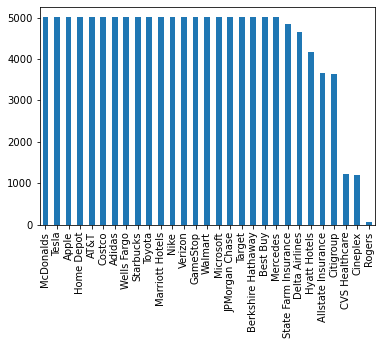

In [9]:
tweets_df['Company'].value_counts().plot.bar()

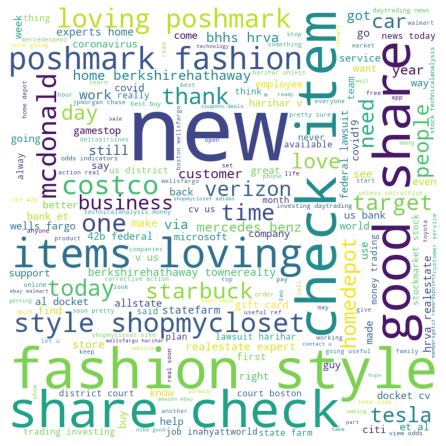

In [10]:
text = " ".join(tweet for tweet in tweets_df['Text'].astype(str))
cloud = wordcloud.WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(text) 

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

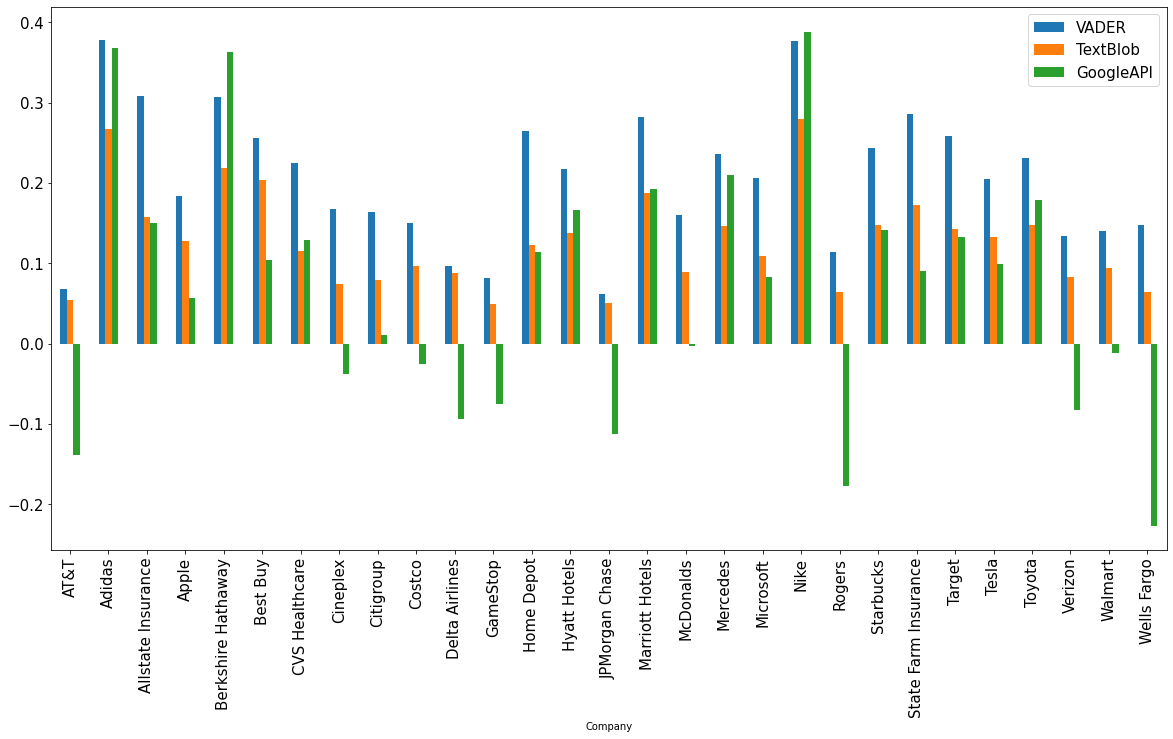

In [3]:
tweets_sentiment = pd.read_csv("../Sentiments/tweets_company_sentiment.csv")
ax = tweets_sentiment.plot.bar(x='Company', rot=90, figsize=(20,10), fontsize=15)
ax.legend(fontsize=15)

In [11]:
news_df = pd.read_csv('../Data/google_articles.csv', encoding = "ISO-8859-1")
news_df = news_df.drop(['link', 'title'], axis=1)

news_df['nlp_summary'] = news_df['nlp_summary'].apply(lambda x: clean_strings(x))
news_df['nlp_summary'] = news_df['nlp_summary'].apply(lambda x: tokenization(x.lower()))
news_df['nlp_summary'] = news_df['nlp_summary'].apply(lambda x: remove_stopwords(x))
news_df['nlp_summary'] = news_df['nlp_summary'].apply(lambda x: join_tokens(x))

news_df = news_df.merge(company_df[['Company', 'NewsKey']], left_on='company', right_on='NewsKey')
news_df = news_df.drop(['company', 'NewsKey'], axis=1)

In [12]:
news_df.head()

,nlp_summary,publish date,Company
0,apple announced apple watch series 6 new healt...,2020-09-15,Apple
1,upgraded camera immersive audioipad air includ...,2020-09-15,Apple
2,also importantly plenty new options apple subs...,2020-09-15,Apple
3,fortnite recently made headlines past summer t...,2020-09-15,Apple
4,enormous class action lawsuit accuses apple br...,2020-09-15,Apple


<AxesSubplot:>

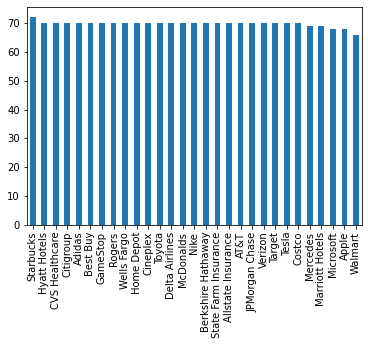

In [13]:
news_df['Company'].value_counts().plot.bar()

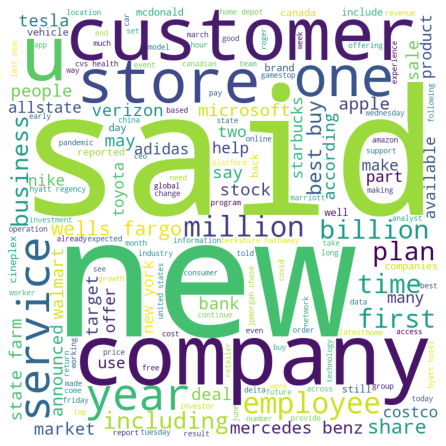

In [14]:
text = " ".join(summary for summary in news_df['nlp_summary'].astype(str))
cloud = wordcloud.WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(text) 

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

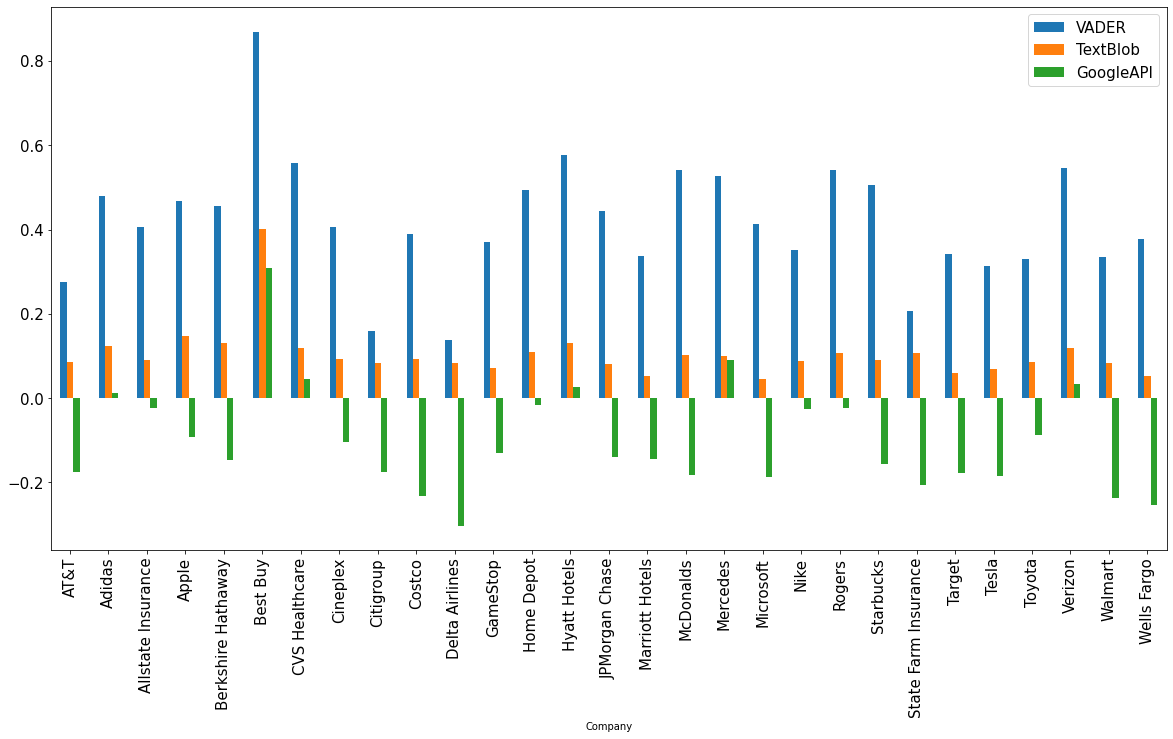

In [4]:
news_sentiment = pd.read_csv("../Sentiments/news_company_sentiment.csv")
ax = news_sentiment.plot.bar(x='Company', rot=90, figsize=(20,10), fontsize=15)
ax.legend(fontsize=15)

In [15]:
blogs_df = pd.read_csv('../Data/huffpost_articles.csv', encoding = "ISO-8859-1")
blogs_df = blogs_df.drop(['link', 'title', 'description'], axis=1)

blogs_df['nlp_summary'] = blogs_df['nlp_summary'].apply(lambda x: clean_strings(x))
blogs_df['nlp_summary'] = blogs_df['nlp_summary'].apply(lambda x: tokenization(x.lower()))
blogs_df['nlp_summary'] = blogs_df['nlp_summary'].apply(lambda x: remove_stopwords(x))
blogs_df['nlp_summary'] = blogs_df['nlp_summary'].apply(lambda x: join_tokens(x))

blogs_df = blogs_df.merge(company_df[['Company', 'BlogKey']], left_on='company', right_on='BlogKey')
blogs_df = blogs_df.drop(['company', 'BlogKey'], axis=1)

In [16]:
blogs_df.head()

,nlp_summary,publish date,Company
0,prince harry robin williams son zak spoken dif...,2021-05-28,Apple
1,lot black friday 2020 deals headphones beats j...,2020-11-18,Apple
2,deals battery packs wireless chargers cables h...,2019-05-30,Apple
3,house speaker nancy pelosi calif appears open ...,2019-04-12,Apple
4,tap turn desktop notifications get news sent s...,2018-08-08,Apple


<AxesSubplot:>

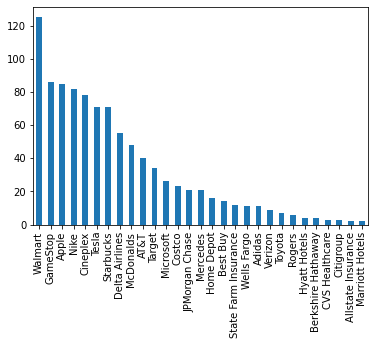

In [17]:
blogs_df['Company'].value_counts().plot.bar()

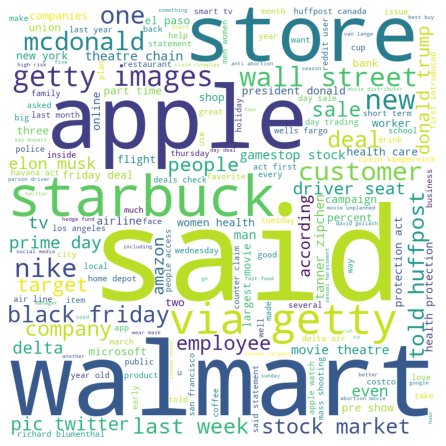

In [18]:
text = " ".join(summary for summary in blogs_df['nlp_summary'].astype(str))
cloud = wordcloud.WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(text) 

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

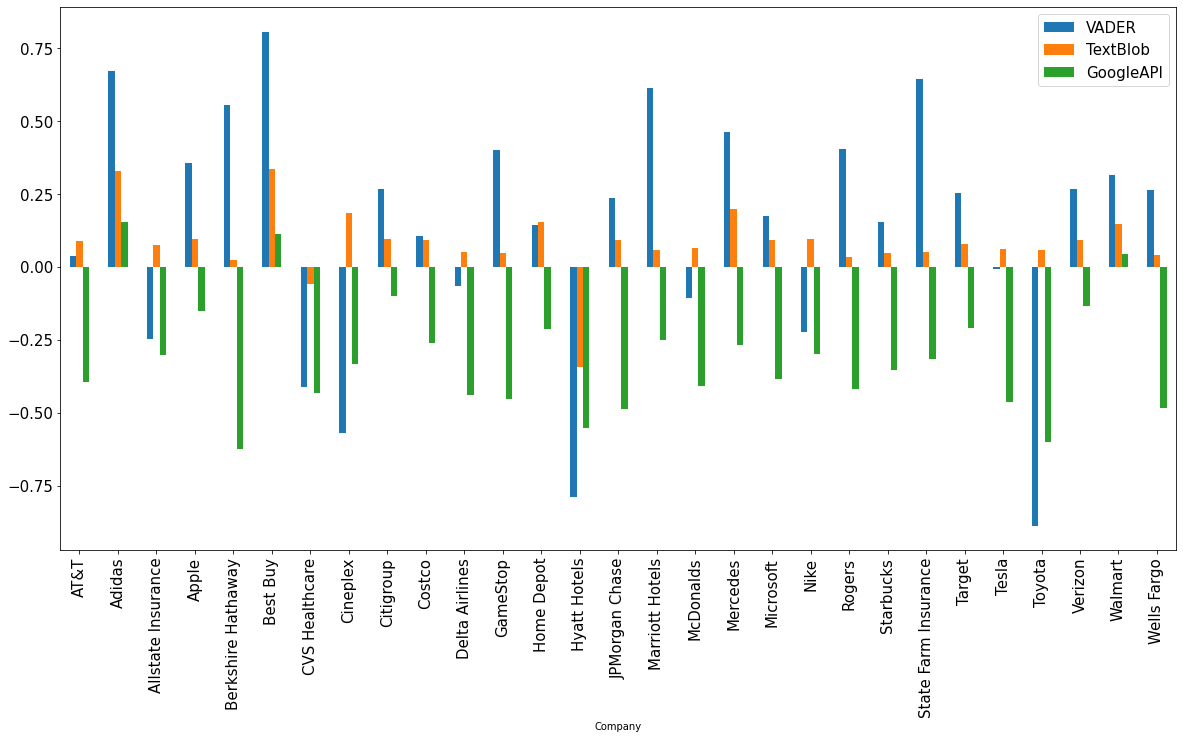

In [6]:
blogs_sentiment = pd.read_csv("../Sentiments/blogs_company_sentiment.csv")
ax = blogs_sentiment.plot.bar(x='Company', rot=90, figsize=(20,10), fontsize=15)
ax.legend(fontsize=15)

In [19]:
reviews_df = pd.read_csv('../Data/yelp_reviews.csv')

reviews_df['text'] = reviews_df['text'].apply(lambda x: clean_strings(x))
reviews_df['text'] = reviews_df['text'].apply(lambda x: tokenization(x.lower()))
reviews_df['text'] = reviews_df['text'].apply(lambda x: remove_stopwords(x))
reviews_df['text'] = reviews_df['text'].apply(lambda x: join_tokens(x))

In [20]:
reviews_df.head()

,Company,stars,text
0,Apple,5,new iphone 7 month stopped charging took apple...
1,Apple,2,every time came store right street either wait...
2,Apple,4,nicely laid accessible staff quite helpful cou...
3,Apple,2,place joke several months ago daughters phones...
4,Apple,1,store awful bought macbook pro best buy lookin...


<AxesSubplot:>

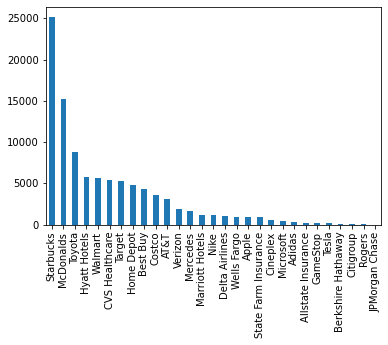

In [21]:
reviews_df['Company'].value_counts().plot.bar()

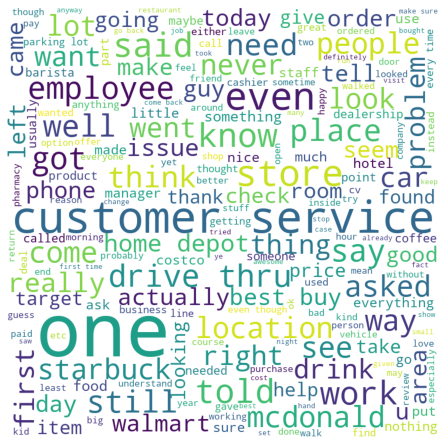

In [22]:
text = " ".join(summary for summary in reviews_df['text'].astype(str))
cloud = wordcloud.WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(text) 

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

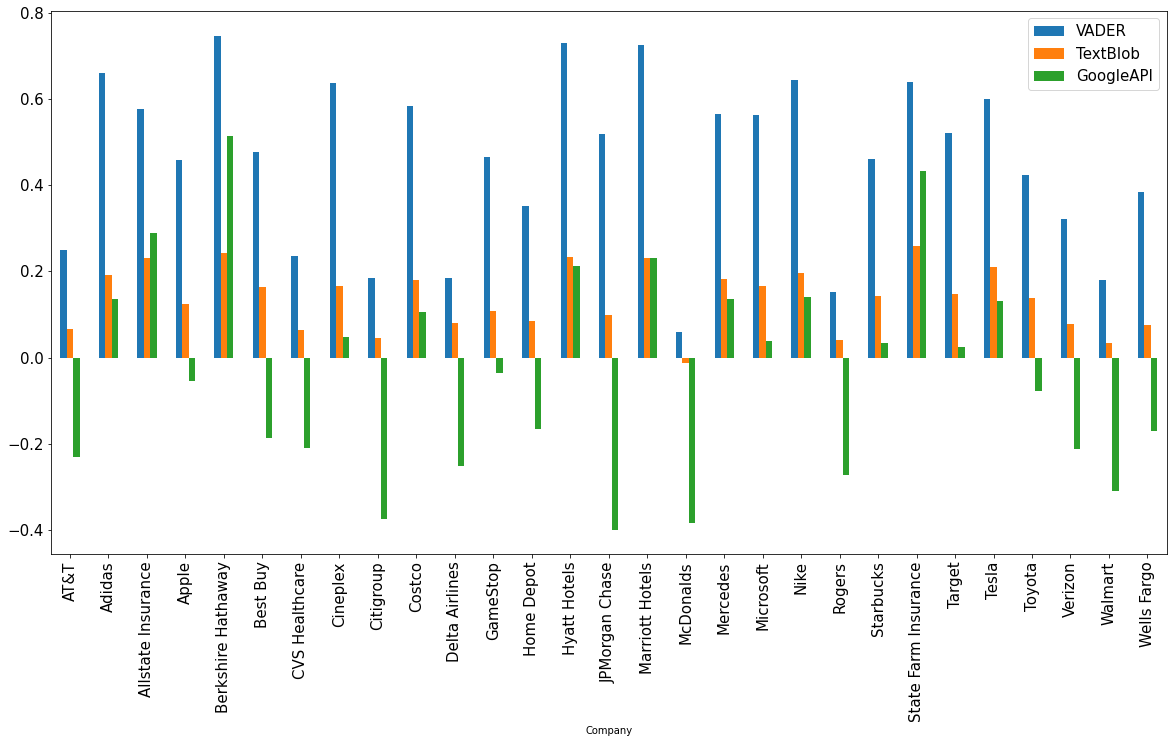

In [10]:
reviews_sentiment = pd.read_csv("../Sentiments/reviews_company_sentiment.csv")
reviews_sentiment = reviews_sentiment.drop(['stars'], axis=1)
ax = reviews_sentiment.plot.bar(x='Company', rot=90, figsize=(20,10), fontsize=15)
ax.legend(fontsize=15)

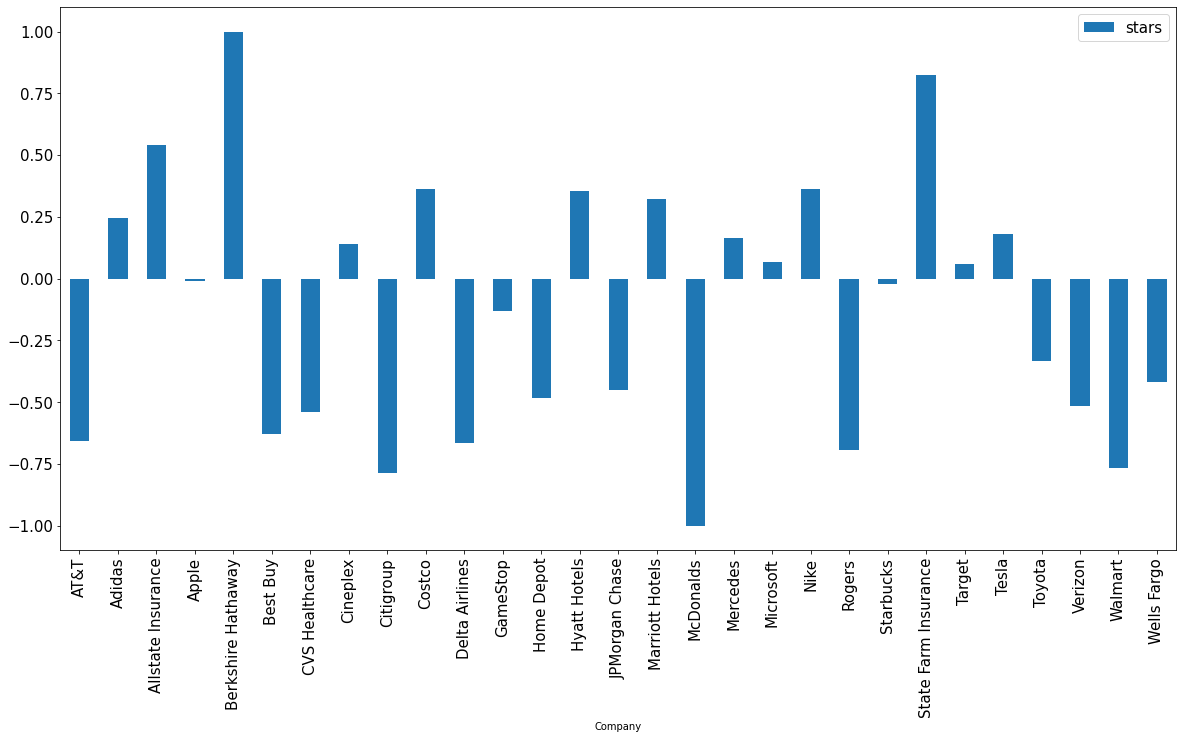

In [30]:
reviews_stars = pd.read_csv("../Sentiments/reviews_company_sentiment.csv")
reviews_stars = reviews_stars[['Company', 'stars']]
scaler = MinMaxScaler((-1, 1))

stars = np.array(reviews_stars['stars']).reshape(-1, 1)
stars_scaled = scaler.fit_transform(stars)
reviews_stars['stars'] = stars_scaled

ax = reviews_stars.plot.bar(x='Company', rot=90, figsize=(20,10), fontsize=15)
ax.legend(fontsize=15)